<a href="https://colab.research.google.com/github/sti1ia/study/blob/main/Electrod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

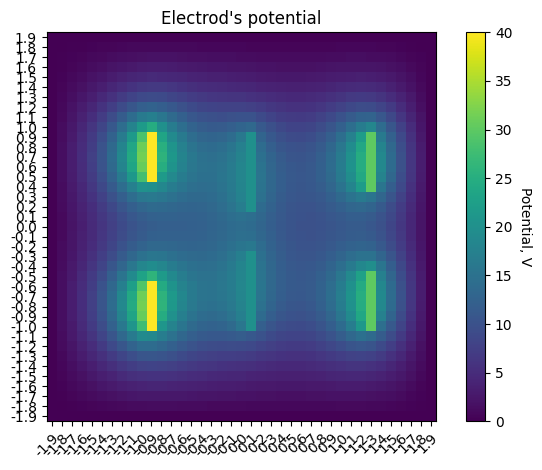

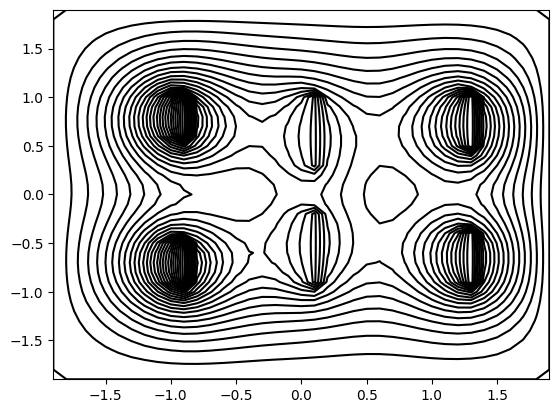

In [ ]:
#Программа построения электрического поля электродов с постоянным напряжением
#По материалам: https://core.ac.uk/download/pdf/151220392.pdf страница 41
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

#Шаг сетки и её границы
step = 0.1
x1, x2 = -2, 2
y1, y2 = -2, 2
length = 2
d1, d2, d3 = 1, 0.4, 0.8
pos1, pos2, pos3 = -1, 0, 1.3
mesh_x = np.arange(x1, x2, step)
mesh_y = np.arange(y1, y2, step)

#Округление чисел в сетке, для графика пригодится
for i in range(0,len(mesh_x)):
  mesh_x[i]=round(mesh_x[i], 2)
for i in range(0,len(mesh_y)):
  mesh_y[i]=round(mesh_y[i], 2)

#Формируем начальный потенциал, везде нулевой
phi = np.zeros([len(mesh_x)-1, len(mesh_y)-1])
phi_prev = np.zeros([len(mesh_x)-1, len(mesh_y)-1])
voltage = [40, 30, 20]
divergence = 0.17*sum(voltage)

#Задаём электроды
def Electrod(phi, mesh_x, mesh_y):
  for i in range( int((abs(x1-x2)-length)/(2*step)),
                 int((abs(x1-x2)-length)/(2*step) + (length-d1)/(2*step)) ):
    phi[i][int((pos1-x1)/step)] = voltage[0]
  for i in range( int((abs(x1-x2)-length)/(2*step) + (length+d1)/(2*step)),
                 int(abs(x1-x2)/step -(abs(x1-x2)-length)/(2*step))):
    phi[i][int((pos1-x1)/step)] = voltage[0]

  for i in range( int((abs(x1-x2)-length)/(2*step)),
                 int((abs(x1-x2)-length)/(2*step) + (length-d2)/(2*step)) ):
    phi[i][int((pos2-x1)/step)] = voltage[2]
  for i in range( int((abs(x1-x2)-length)/(2*step) + (length+d2)/(2*step)),
                 int(abs(x1-x2)/step -(abs(x1-x2)-length)/(2*step))):
    phi[i][int((pos2-x1)/step)] = voltage[2]

  for i in range( int((abs(x1-x2)-length)/(2*step)),
                 int((abs(x1-x2)-length)/(2*step) + (length-d3)/(2*step)) ):
    phi[i][int((pos3-x1)/step)] = voltage[1]
  for i in range( int((abs(x1-x2)-length)/(2*step) + (length+d3)/(2*step)),
                 int(abs(x1-x2)/step -(abs(x1-x2)-length)/(2*step))):
    phi[i][int((pos3-x1)/step)] = voltage[1]
  return phi
phi=Electrod(phi, mesh_x, mesh_y)


#Функция проверки нужно ли больше иттераций:
#Если есть точка с приростом более divergence Вольт, то продолжить
def iter_check(phi, phi_prev, divergence):
  max = 0.0
  for i in range(0, len(mesh_y)-1):
    for j in range(0, len(mesh_x)-1):
      if abs(phi[i][j]-phi_prev[i][j]) > max:
        max = abs(phi[i][j]-phi_prev[i][j])
  if max > divergence:
    return True
  else:
    return False

#Проведение иттераций конечно-разностного приближения
while iter_check(phi, phi_prev, divergence):
  for i in range(1, len(mesh_y)-2):
    for j in range(1, len(mesh_x)-2):
      phi[i][j] = 0.25*(phi[i-1][j]+phi[i+1][j]+phi[i][j-1]+phi[i][j+1])
  phi_prev = phi.copy()
  phi = Electrod(phi, mesh_x, mesh_y)

#Модуль построения тепловой карты
fig1, ax = plt.subplots()
im = ax.imshow(phi)
ax.set_title("Electrod's potential")
ax.set_xticks(np.arange(phi.shape[0]), labels=mesh_x[1:])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
ax.set_yticks(np.arange(phi.shape[1]), labels=reversed(mesh_y[1:]))
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Potential, V", rotation=-90, va="bottom")
fig1.tight_layout()
plt.show()

fig2, ax2 = plt.subplots()
plt.contour(mesh_x[1:], mesh_y[1:], phi, colors='black', levels=30)
plt.show()

